In [41]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, log_loss, jaccard_score

# Specific for ML
from sklearn.preprocessing import StandardScaler

UC3MAL201 Machine Learning Session 8 Activity sheet 8 Leon Eriksen Helgeland -
First written 03.09.2020

# Clustering - with K-Means

## Objective
The aim of this activity sheet is to load a customer segmentation dataset and apply K- Means clustering on it.

### Dataset Desc

In [42]:
dataset_file_name = 'dataset8.csv'
dataset_directory = 'dataset'

## TASK 1 (Data pre-processing)
Load customer segmentation data from the csv file. Select the feature set for the modelling. You do not necessarily need all the given variables. Perform the data preprocessing steps such as normalisation.


#### 1.1 Load csv 

In [43]:
dataframe = pd.read_csv(f'{dataset_directory}/{dataset_file_name}')
df = dataframe

#### 1.3 Explore dataframe and features

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [45]:
df.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8


<AxesSubplot:>

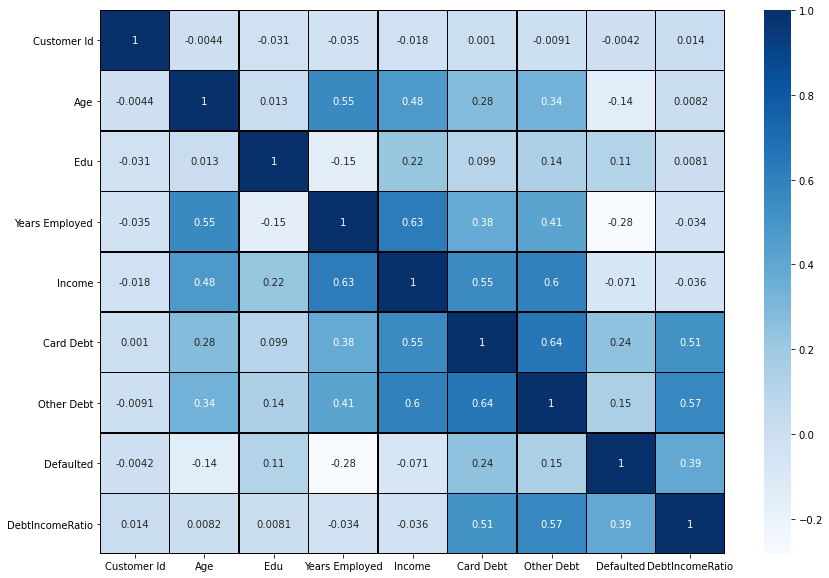

In [46]:
# some exploration
correlation = df.corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

#### 1.3 Select feature set

In [47]:
X = df.drop(['Customer Id','Card Debt','Other Debt','Defaulted','DebtIncomeRatio'], axis=1)

In [48]:
# Normalization
# data = X
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data)
# print(data)
# print(scaled_data)
# X = scaled_data

#### 1.4 Train test split and Standardscaler

In [49]:
X_train, X_test = train_test_split(X, test_size=0.7, random_state=42)

## TASK 2 (K-Means applica#on)
Apply K-Means algorithm on the processed dataset. You can set K = 3 at the beginning. However, you might also try out some other values for K. Try to tease apart the outcome while varying the initial choice of K. The idea of this activity sheet is to mainly learn the ways of implementing K-Means algorithm in Python. Analysing the clusters within the dataset are not mandatory. Nonetheless, you are free to play with the dataset and formulate any meaningful insights.

In [50]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)


In [51]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X_train, kmeans.labels_))

[[ 41.01470588   1.86764706  14.14705882  72.67647059]
 [ 32.95402299   1.59770115   6.03448276  29.89655172]
 [ 45.           2.15384615  20.23076923 172.15384615]]
[1 2 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 2 1 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1
 2 1 1 1 1 0 1 0 1 1 0 1 2 0 1 2 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 2 1
 1 1 2 1 0 2 2 0 1 1 0 1 1 1 0 1 1 0 1 1 2 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1
 1 0 0 1 2 0 1 1 1 1 0 1 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0]


In [66]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X_train, kmeans.labels_))

0.5300195850330636


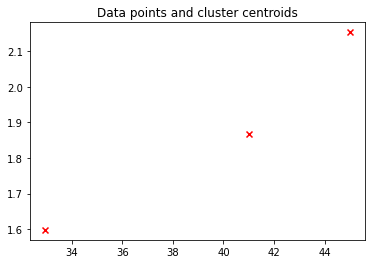

In [62]:
# Plotting the cluster centers and the data points on a 2D plane
#plt.scatter(X_train[:, 0], X_test[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [74]:
silhouette_score_list = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_train)
    print(f'K={i}, \nCluster centroids: {kmeans.cluster_centers_}, \nCluster Labels: {kmeans.labels_},  \nCluster silhouette score: {silhouette_score(X_train, kmeans.labels_)}\n\n')
    silhouette_score_list.append(silhouette_score(X_train, kmeans.labels_))
    

K=2, 
Cluster centroids: [[ 43.85185185   1.81481481  19.74074074 137.81481481]
 [ 34.75438596   1.68421053   7.64035088  37.98684211]], 
Cluster Labels: [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],  
Cluster silhouette score: 0.7100532725086742


K=3, 
Cluster centroids: [[ 41.01470588   1.86764706  14.14705882  72.67647059]
 [ 32.95402299   1.59770115   6.03448276  29.89655172]
 [ 45.           2.15384615  20.23076923 172.15384615]], 
Cluster Labels: [1 2 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 2 1 

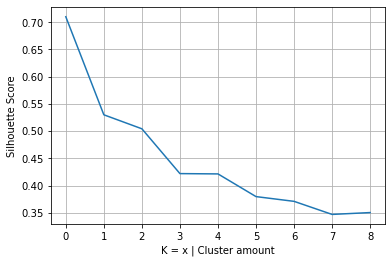

In [78]:
plt.plot(silhouette_score_list)
plt.ylabel('Silhouette Score')
plt.xlabel('K = x | Cluster amount')
plt.grid()